In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Nguồn code tham khảo: [kaggle](https://www.kaggle.com/code/ayoubaziamimer/country-data-eda-pca-comparison/notebook)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px

In [84]:
#Đọc dữ liệu
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [85]:
#Kiểm tra thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [86]:
#Kiểm tra mô tả thống kê các biến số
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [87]:
#Kiểm tra số lượng giá trị thiếu
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


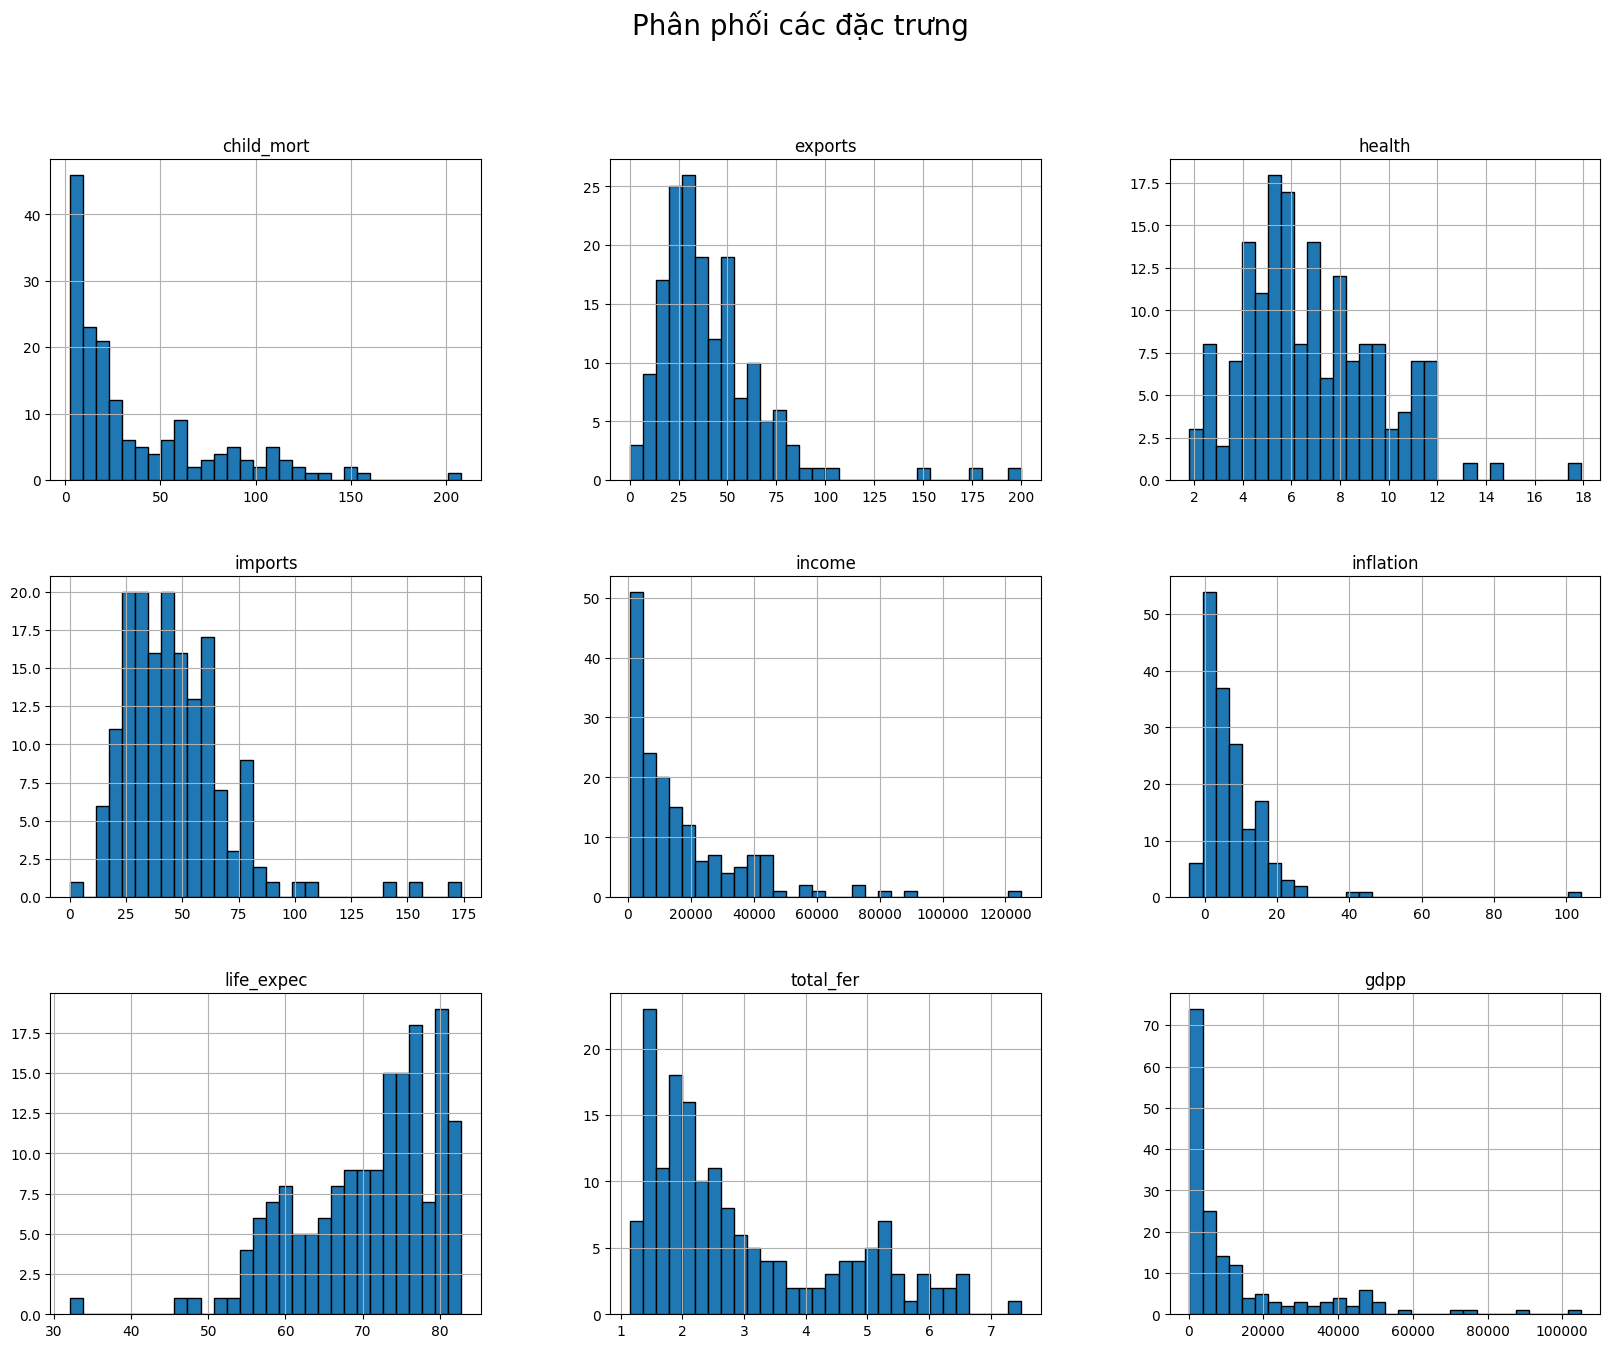

In [88]:
#Vẽ histogram để xem phân phối
data.hist(bins = 30, figsize = (20, 15), edgecolor = 'k')
plt.suptitle('Phân phối các đặc trưng', fontsize = 20)
plt.show()

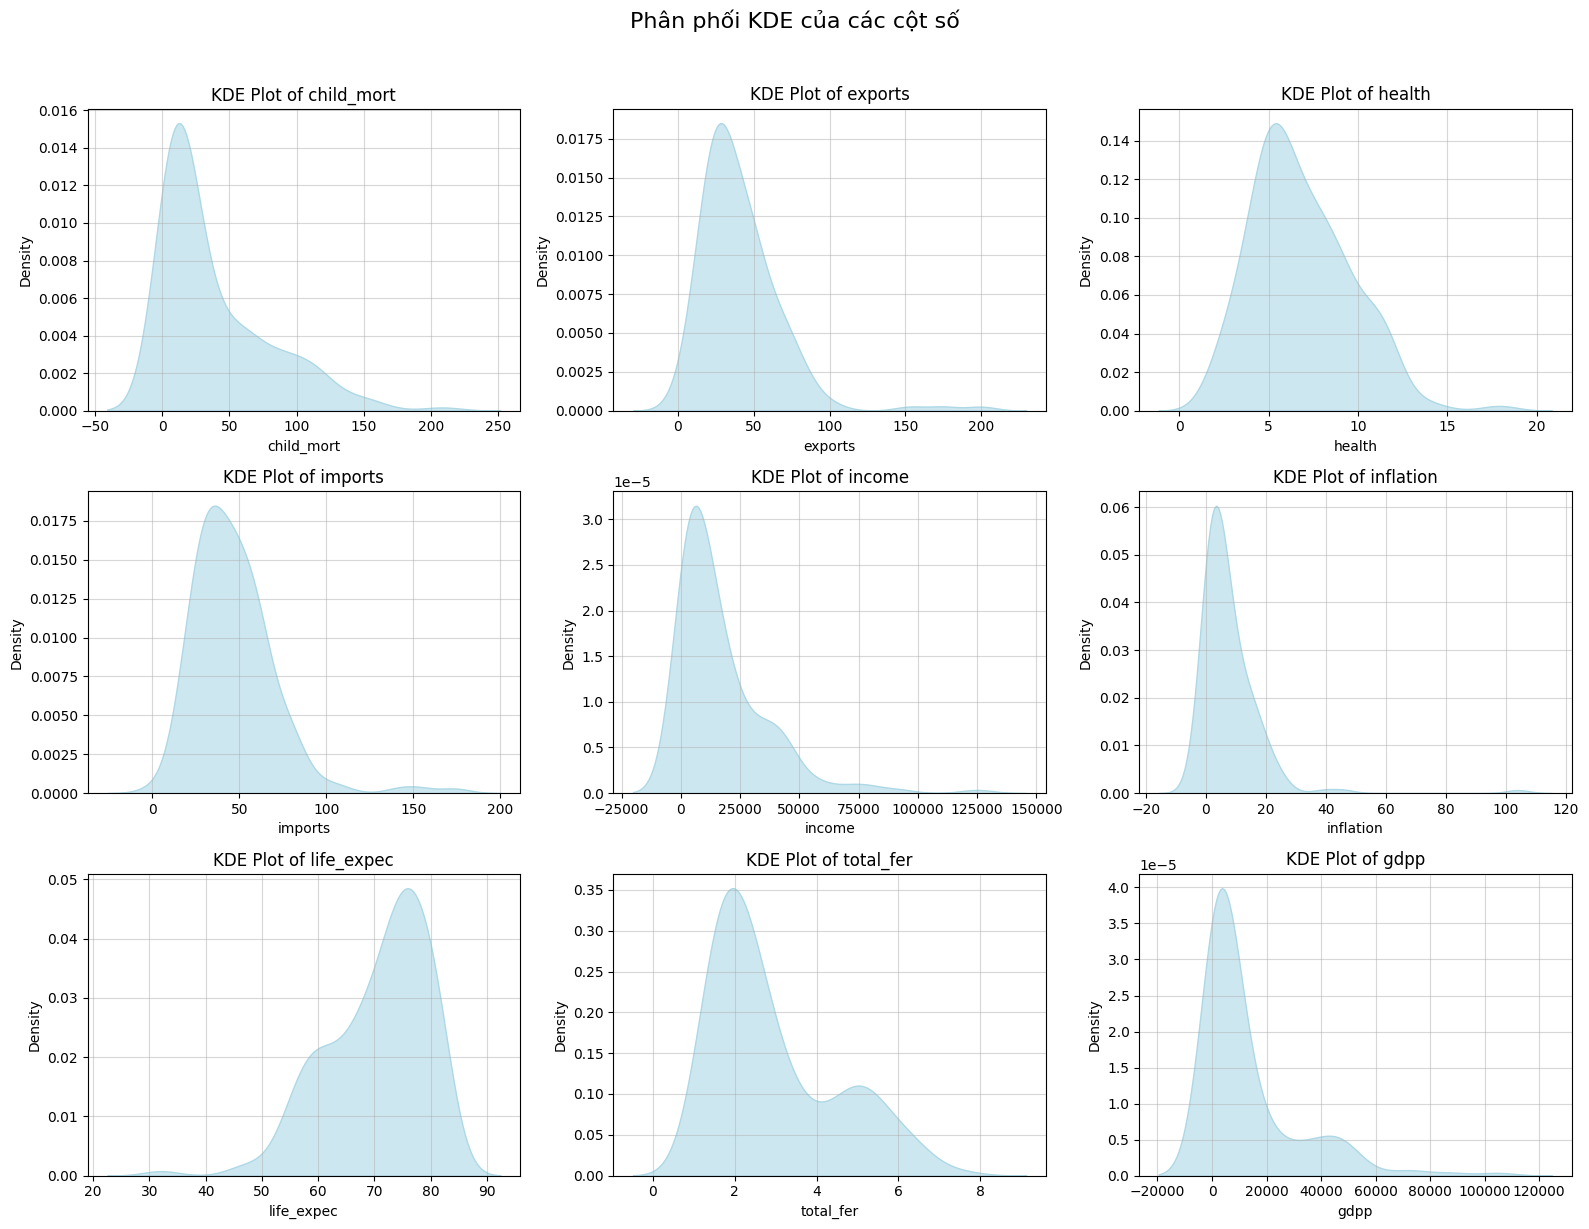

In [89]:
#Kiểm tra phân phối với KDE
columns = data.select_dtypes(include=['number']).columns
n_cols = 3 #Số cột trong mỗi hàng
n_rows = (len(columns)) // n_cols + (len(columns)) % n_cols #Số hàng cần

#Tạo fig và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4* n_rows))
axes = axes.flatten()  # Chuyển mảng axes thành danh sách để dễ lặp qua

# Vẽ KDE plot cho từng cột
for i, col in enumerate(columns):
    sns.kdeplot(data=data, x=col, fill=True, ax=axes[i], color='lightblue', alpha=0.6)
    axes[i].set_title(f'KDE Plot of {col}', fontsize=12)
    axes[i].grid(True, alpha=0.5)

# Xóa subplot thừa (nếu có)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Thêm tiêu đề chung
fig.suptitle('Phân phối KDE của các cột số', fontsize=16, y=1.02)

# Tinh chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.show()

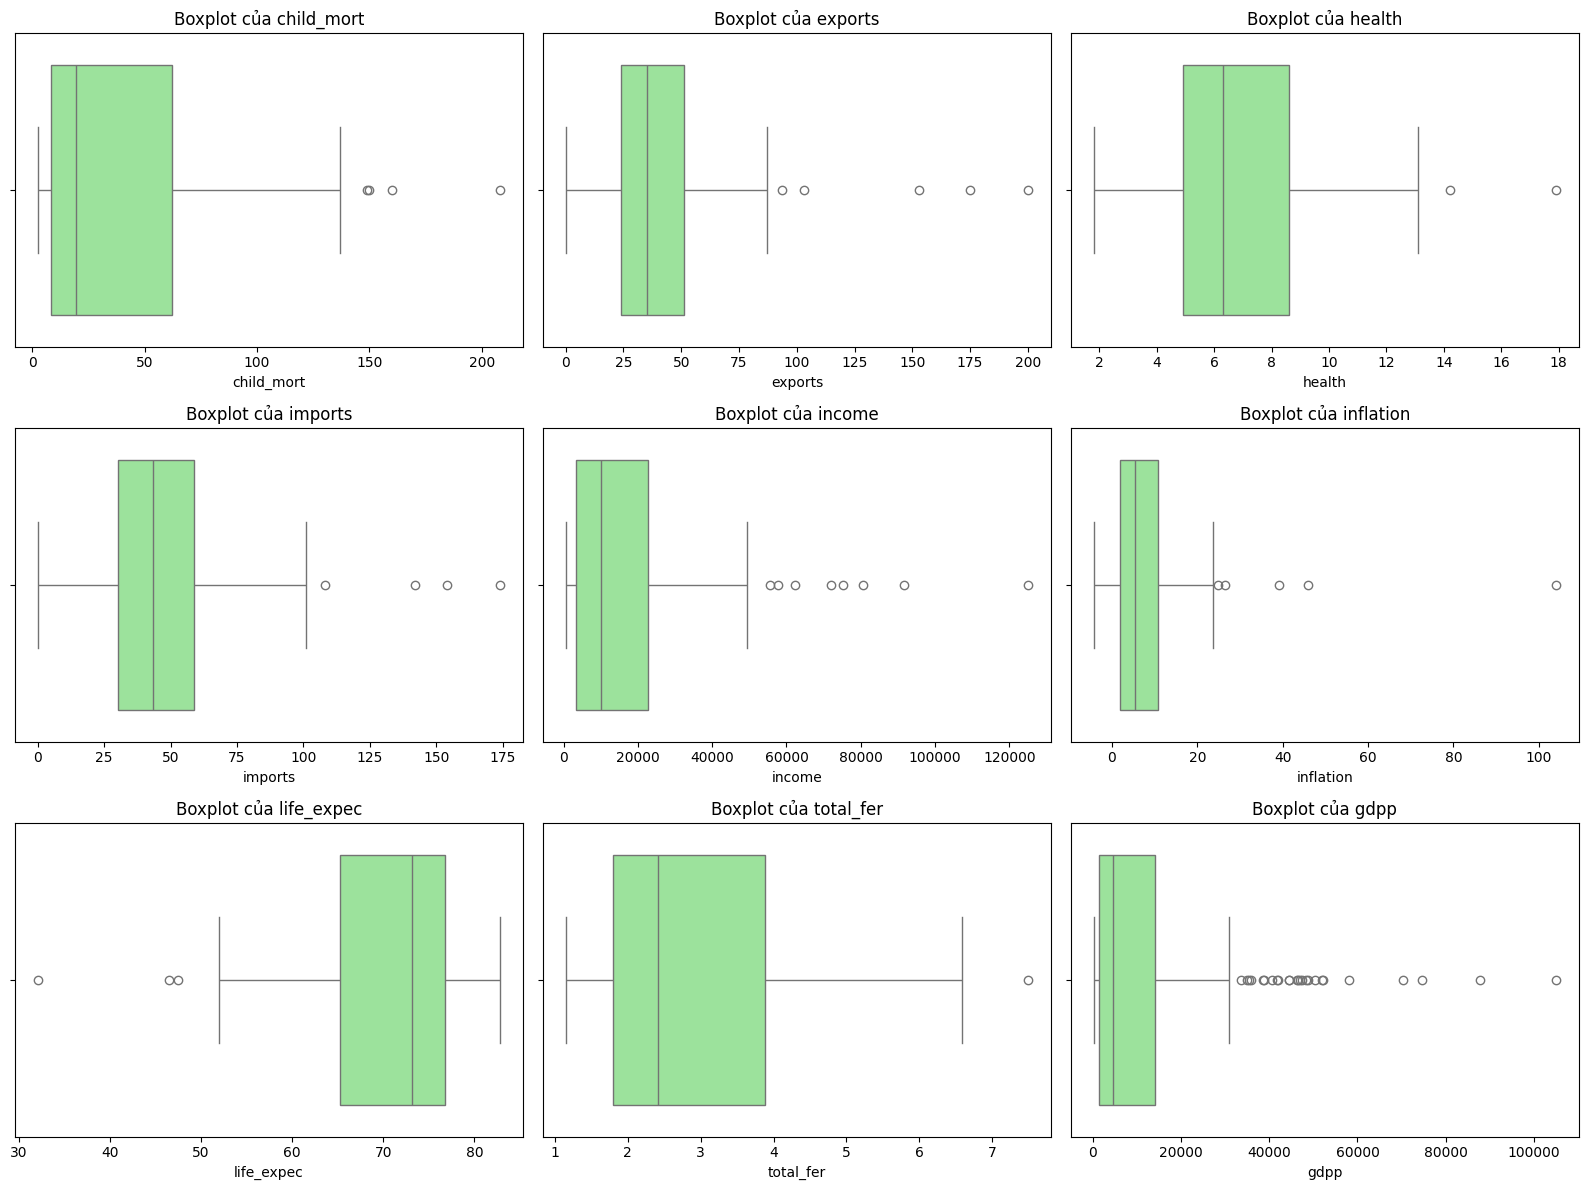

In [90]:
#Vẽ boxplot để phát hiện outliers
columns = data.select_dtypes(include=['number']).columns
n_cols = 3 #Số cột trong mỗi hàng
n_rows = (len(columns)) // n_cols + (len(columns)) % n_cols #Số hàng cần

#Tạo fig và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4* n_rows))

#Vẽ boxplot cho từng cột
for i, col in enumerate(columns):
  row = i // n_cols
  col_idx = i % n_cols
  ax = axes[row, col_idx]
  sns.boxplot(data = data, x = col, ax = ax, color = 'lightgreen')
  ax.set_title(f'Boxplot của {col}')

#Xóa subplot không dùng đến nếu thừa
for i in range(len(columns), n_rows * n_cols):
  row = i // n_cols
  col_idx = i % n_cols
  fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

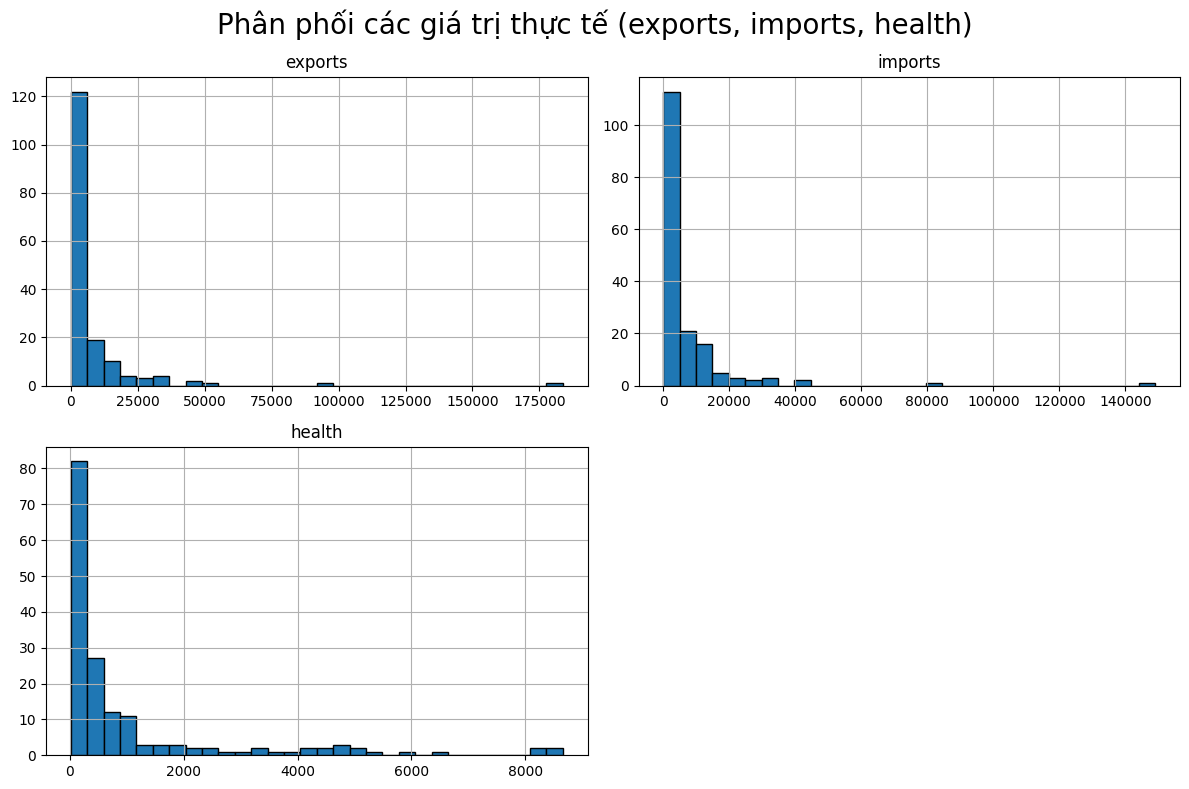

In [91]:
#Chuyển đổi dữ liệu % (health, imports, exports) thành dữ liệu thực
data['exports'] = (data['exports'] / 100) * data['gdpp']
data['imports'] = (data['imports'] / 100) * data['gdpp']
data['health'] = (data['health'] / 100) * data['gdpp']

#Vẽ histogram cho các giá trị thực tế
columns_real = ['exports', 'imports', 'health']
data[columns_real].hist(bins=30, figsize=(12, 8), edgecolor='k')
plt.suptitle('Phân phối các giá trị thực tế (exports, imports, health)', fontsize=20)
plt.tight_layout()
plt.show();

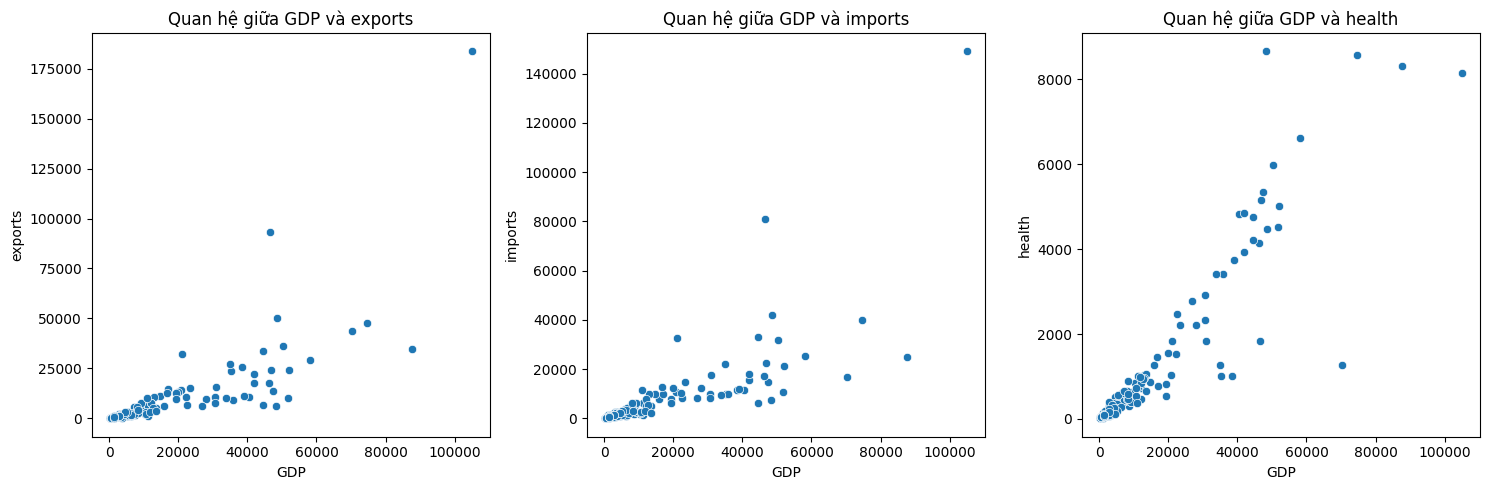

In [92]:
#Đánh giá sự phân phối của từng quốc gia bằng scatter plot
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_real):
  plt.subplot(1, 3, i+1)
  sns.scatterplot(x='gdpp', y=col, data=data)
  plt.title(f'Quan hệ giữa GDP và {col}')
  plt.xlabel('GDP')
  plt.ylabel(col)
plt.tight_layout()
plt.show();

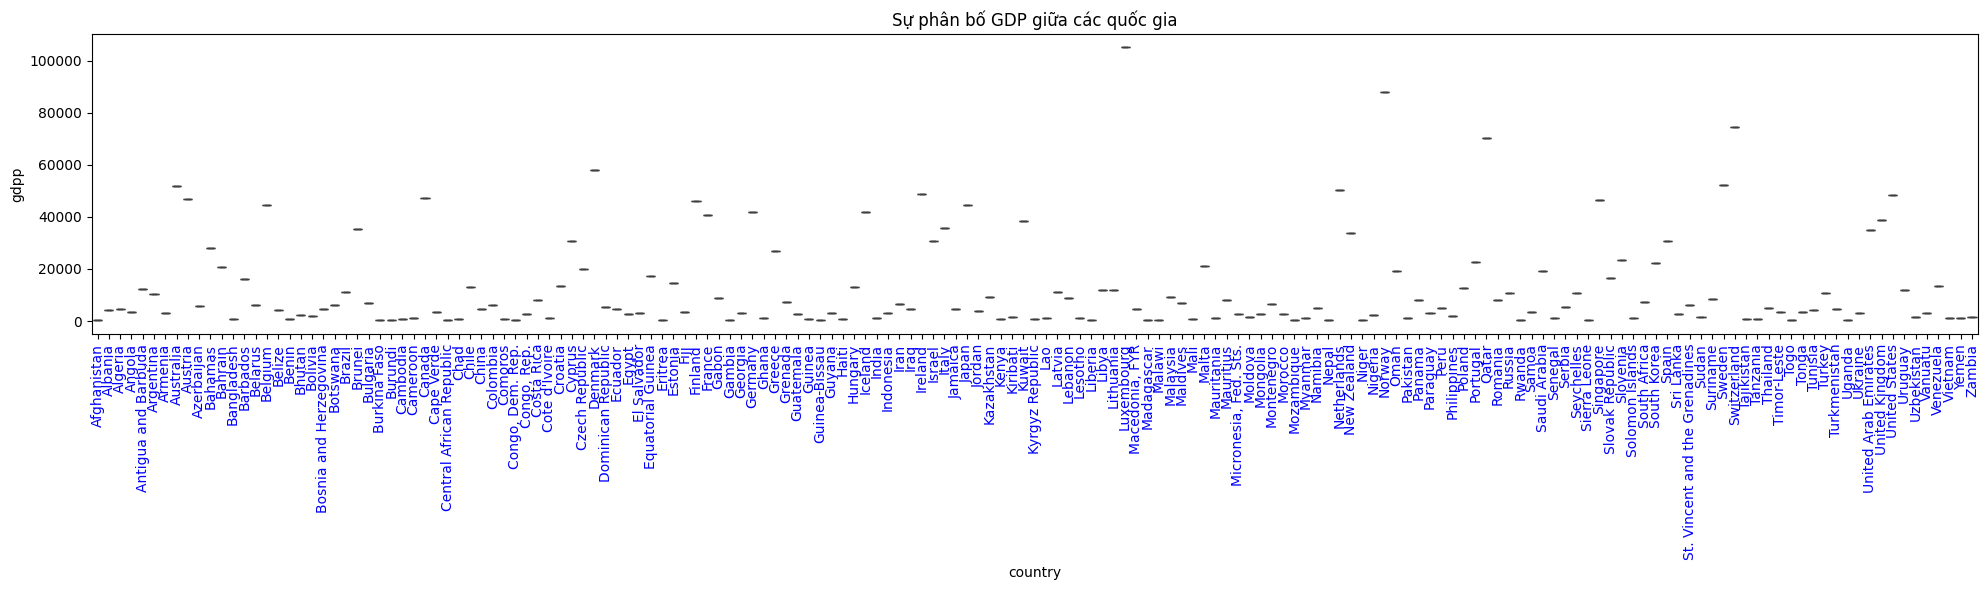

In [93]:
#Kiểm tra sự cân bằng giữa các quốc gia
plt.figure(figsize=(20, 6))
sns.boxplot(x='country', y='gdpp', data=data)
plt.xticks(rotation=90, color = 'blue')
plt.title('Sự phân bố GDP giữa các quốc gia')
plt.tight_layout()
plt.show();

In [94]:
data1 = data.drop(columns = ['country'])
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [95]:
nb_features = data1.shape[1]-1
nb_features

8

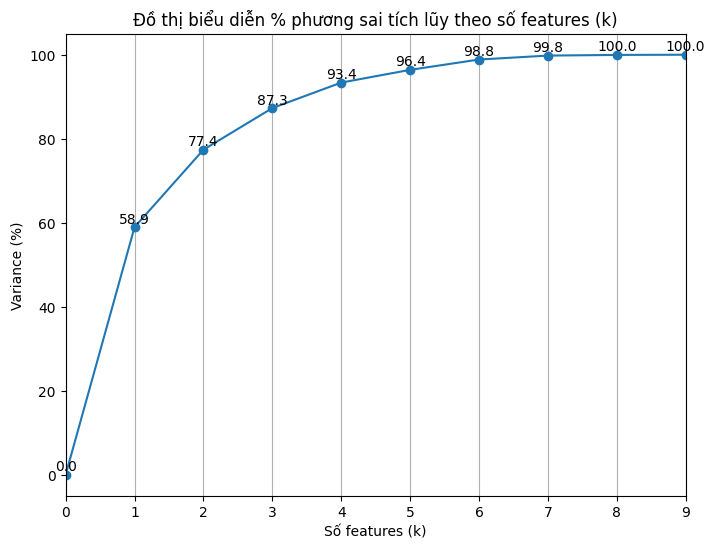

In [96]:
scaled_data = StandardScaler().fit_transform(data1)
pca = PCA()
pca.fit(scaled_data)

points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 2)
y_i = (points[-10:])//0.01/100

plt.figure(figsize = (8, 6))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()

In [97]:
#Áp dụng PCA với thành phần tối ưu
pca = PCA(n_components=3)
scores = pca.fit_transform(scaled_data)
# chuyển thành DataFrame để dễ dàng thao tác hơn
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df.head()

,PC1,PC2,PC3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430


# Optics

In [98]:
# Thử nghiệm với các giá trị min_samples khác nhau
for min_samples in [3, 5, 10]:
    # Thử nghiệm với các giá trị xi khác nhau
    for xi in [0.05, 0.1, 0.2]:
        # Thử nghiệm với các giá trị min_cluster_size khác nhau
        for min_cluster_size in [0.3, 0.5, 0.7]:
            # Thực hiện thuật toán OPTICS
            OP = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size, metric='euclidean')
            OP_df = OP.fit_predict(scores)

            # Check for the number of unique labels
            n_clusters = len(np.unique(OP_df))

            # Calculate silhouette score only if more than 1 cluster is found
            if n_clusters > 1:
                silhouette_avg = silhouette_score(scores, OP_df)
                print(f"min_samples: {min_samples}, xi: {xi}, min_cluster_size: {min_cluster_size},  Silhouette Score: {silhouette_avg}")

min_samples: 3, xi: 0.05, min_cluster_size: 0.3,  Silhouette Score: 0.09136405494708613
min_samples: 3, xi: 0.05, min_cluster_size: 0.5,  Silhouette Score: 0.2323771597126316
min_samples: 3, xi: 0.05, min_cluster_size: 0.7,  Silhouette Score: 0.44598822308197283
min_samples: 3, xi: 0.1, min_cluster_size: 0.3,  Silhouette Score: 0.44598822308197283
min_samples: 3, xi: 0.1, min_cluster_size: 0.5,  Silhouette Score: 0.44598822308197283
min_samples: 3, xi: 0.1, min_cluster_size: 0.7,  Silhouette Score: 0.44598822308197283
min_samples: 3, xi: 0.2, min_cluster_size: 0.3,  Silhouette Score: 0.5722623738943571
min_samples: 3, xi: 0.2, min_cluster_size: 0.5,  Silhouette Score: 0.5722623738943571
min_samples: 3, xi: 0.2, min_cluster_size: 0.7,  Silhouette Score: 0.5722623738943571
min_samples: 5, xi: 0.05, min_cluster_size: 0.3,  Silhouette Score: 0.13541228468298433
min_samples: 5, xi: 0.05, min_cluster_size: 0.5,  Silhouette Score: 0.32790041723013524
min_samples: 5, xi: 0.05, min_cluster_size

In [99]:
#Áp dụng thuật toán OPTICS
optics = OPTICS(min_samples=3, xi=0.2, min_cluster_size=0.3,  metric = 'euclidean')
OP_df = optics.fit_predict(scores)

In [100]:
# Thêm nhãn cluster vào DataFrame
data['Cluster'] = OP_df

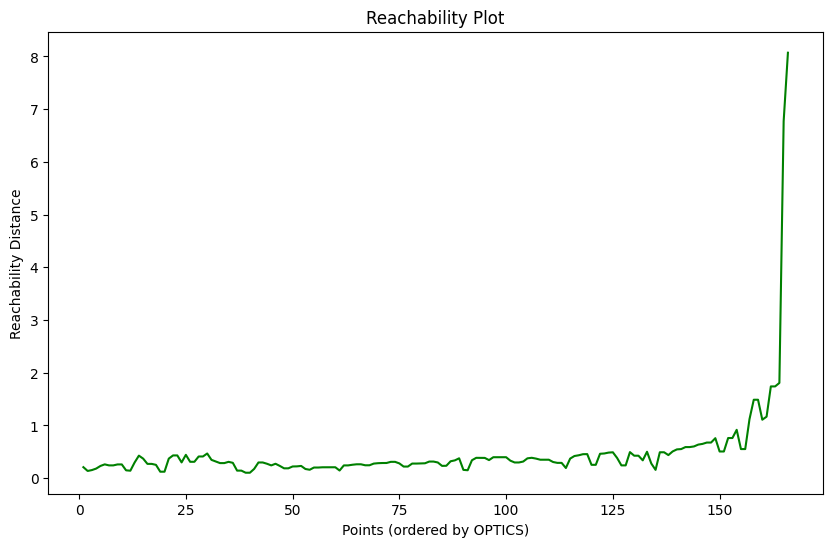

In [101]:
# Vẽ Reachability Plot
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(10, 6))
plt.plot(reachability, 'g-', linewidth=1.5)
plt.xlabel('Points (ordered by OPTICS)')
plt.ylabel('Reachability Distance')
plt.title('Reachability Plot')
plt.show();

In [102]:
pca_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(3)])
pca_df['Cluster'] = OP_df
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', title="Phân cụm OPTICS trong không gian PCA")
fig.show()

Silhouette Score: 0.5722623738943571


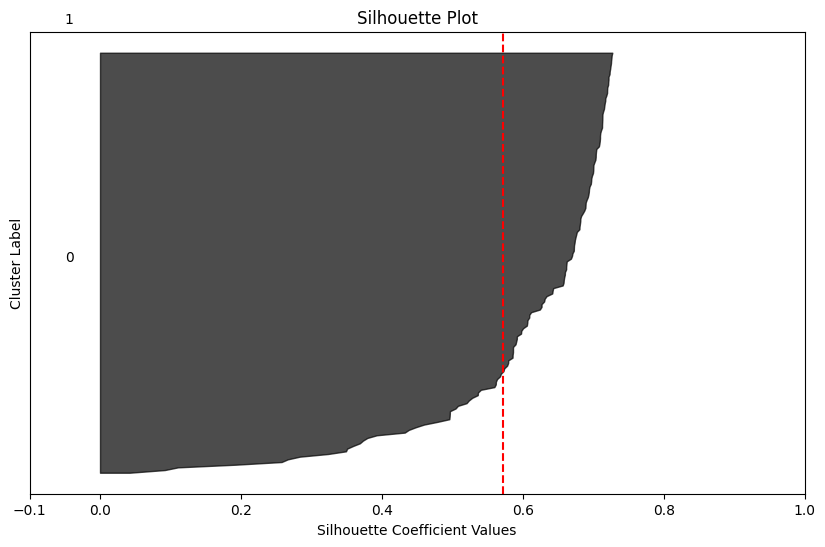

In [103]:
import matplotlib.cm as cm

# Tính chỉ số silhouette
silhouette_avg = silhouette_score(scores, OP_df)
print(f"Silhouette Score: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(scores, OP_df)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10

for i in range(len(np.unique(OP_df))):
    ith_cluster_silhouette_values = sample_silhouette_values[OP_df == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(OP_df)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [104]:
data[data['Cluster'] == -1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.900,60.9,5.21,17100,-1
91,Luxembourg,2.8,183750.00,8158.500,149100.00,91700,3.620,81.3,1.63,105000,-1
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.200,66.2,2.64,2650,-1
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.000,60.5,5.84,2330,-1
114,Norway,3.2,34856.60,8323.440,25023.00,62300,5.950,81.0,1.95,87800,-1
123,Qatar,9.0,43796.90,1272.430,16731.40,125000,6.980,79.5,2.07,70300,-1
133,Singapore,2.8,93200.00,1845.360,81084.00,72100,-0.046,82.7,1.15,46600,-1
145,Switzerland,4.5,47744.00,8579.000,39761.80,55500,0.317,82.2,1.52,74600,-1
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.900,75.4,2.47,13500,-1


In [115]:
data[data['Cluster']==-1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,34.055556,47077.093333,3318.883444,36228.452222,52184.444444,25.646778,74.411111,2.720000,46653.333333,-1.0
std,49.854491,59317.590771,3814.291353,49484.239769,40587.560321,34.016494,9.291185,1.662521,39228.433247,0.0
min,2.800000,589.490000,118.131000,405.420000,5150.000000,-0.046000,60.500000,1.150000,2330.000000,-1.0
25%,3.200000,3847.500000,662.850000,2376.000000,16500.000000,3.620000,66.200000,1.630000,13500.000000,-1.0
50%,9.000000,34856.600000,1272.430000,16731.400000,55500.000000,6.980000,79.500000,2.070000,46600.000000,-1.0
75%,26.100000,47744.000000,8158.500000,39761.800000,72100.000000,39.200000,81.300000,2.640000,74600.000000,-1.0
max,130.000000,183750.000000,8579.000000,149100.000000,125000.000000,104.000000,82.700000,5.840000,105000.000000,-1.0


In [117]:
data[data['Cluster']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0


In [116]:
data[data['Cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,38.510127,5161.705744,927.876545,4899.991975,15148.753165,6.764209,70.336076,2.960949,11045.151899,0.0
std,39.899032,8185.544828,1542.626579,7128.033110,15317.154904,6.312360,8.850019,1.509675,14422.828412,0.0
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000,0.0
25%,8.625000,428.284500,67.989000,571.837500,3290.000000,1.790000,65.300000,1.810000,1310.000000,0.0
50%,19.750000,1733.350000,297.416000,1981.770000,9925.000000,5.025000,72.950000,2.410000,4550.000000,0.0
75%,62.150000,6051.475000,890.445000,6356.390000,21100.000000,10.075000,76.675000,3.895000,12500.000000,0.0
max,208.000000,50161.000000,8663.600000,42125.500000,80600.000000,26.500000,82.800000,7.490000,58000.000000,0.0


# So sánh với thuật toán khác

# K-Means

In [106]:
from sklearn.cluster import KMeans
X_numerics = scores_df[['PC1', 'PC2', 'PC3']]
KM_3_clusters = KMeans(n_clusters=3).fit(X_numerics) # khởi tạo và điều chỉnh mô hình K-Means
KM3_clustered = X_numerics.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # gắn nhãn vào điểm

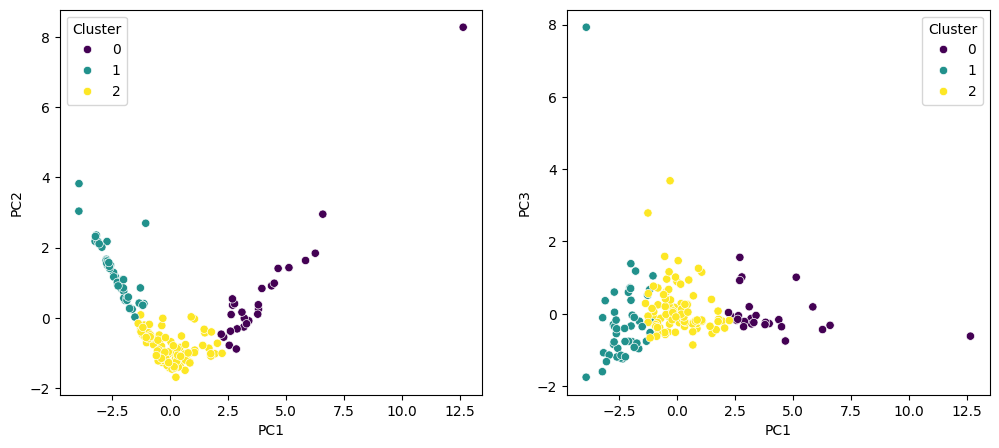

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

# Removed 'data' argument from the scatterplot calls, it's already provided through 'x' and 'y'
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=KM3_clustered,
                ax=axes[0],palette='viridis', legend='full')

sns.scatterplot(x='PC1', y='PC3', hue='Cluster', data=KM3_clustered,
                palette='viridis', ax=axes[1], legend='full')

plt.show()

In [108]:
import plotly.express as px
fig = px.scatter_3d(KM3_clustered, color='Cluster', x='PC1', y='PC2', z='PC3',
                    title="Phân cụm với K-means trong không gian 3D",
                    )
# Hiển thị đồ thị
fig.show()

Silhouette Score: 0.4786795843501643


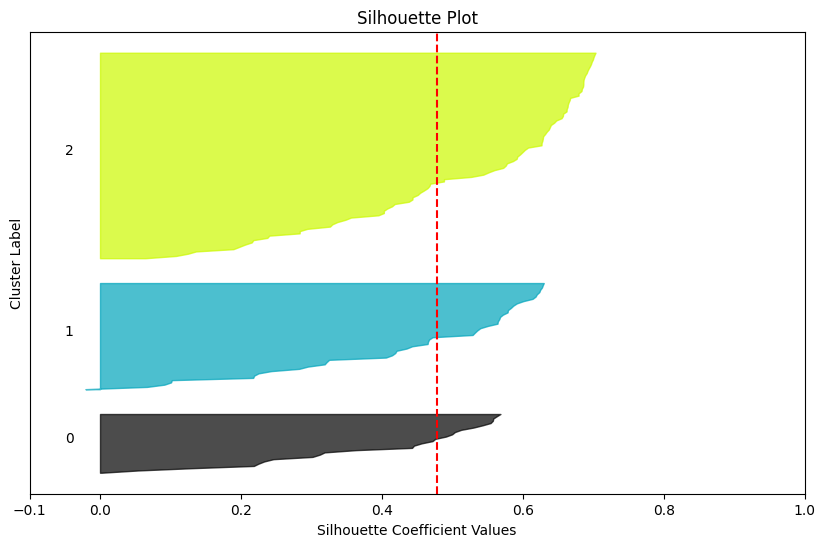

In [109]:
silhouette_avg = silhouette_score(scores,KM3_clustered['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scores,KM3_clustered['Cluster'])

# Create a silhouette plot
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10

for i in range(len(np.unique(KM3_clustered['Cluster']))):
    ith_cluster_silhouette_values = sample_silhouette_values[KM3_clustered['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(KM3_clustered['Cluster'])))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

## DBSCAN

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import numpy as np

eps_values = np.arange(1, 2, 5)
min_samples = np.arange(3, 10)

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    labels = DBS_clustering.labels_

    # Check for the case where only one cluster is formed or all are noise (-1)
    n_clusters = len(np.unique(labels))
    if n_clusters > 1:
        no_of_clusters.append(n_clusters)
        sil_score.append(silhouette_score(X_numerics, labels))
    else:
        no_of_clusters.append(1) # or append -1 if you want to show as noise
        sil_score.append(np.nan) # or any other value you prefer

In [111]:
DBS_clustering = DBSCAN(eps=1, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # gắn (label) nhãn vào điểm

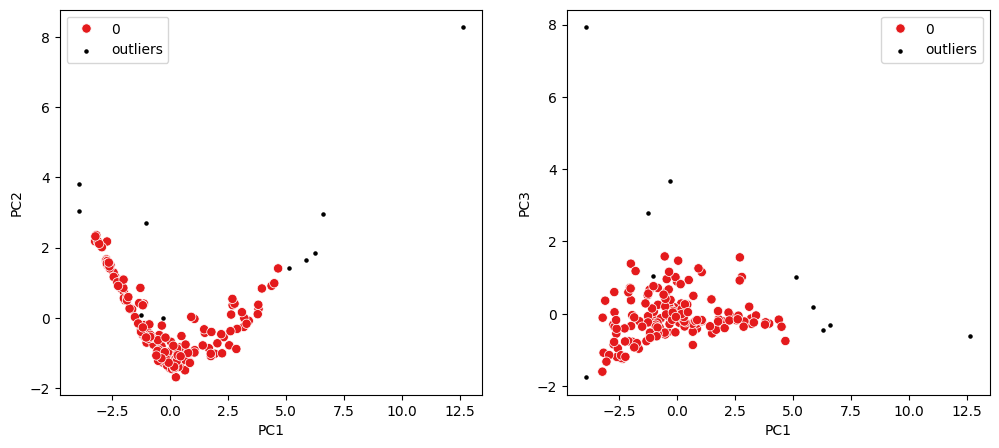

In [112]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='PC1', y='PC2',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='PC1', y='PC3',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['PC1'], outliers['PC2'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['PC1'], outliers['PC3'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [113]:
# Change 'color='Clusters'' to 'color='Cluster''
fig = px.scatter_3d(DBSCAN_clustered, color='Cluster', x='PC1', y='PC2', z='PC3',
                    title="Phân cụm với DBSCAN trong không gian 3D",
                    )

# Hiển thị đồ thị
fig.show()

Silhouette Score: 0.561604876112622


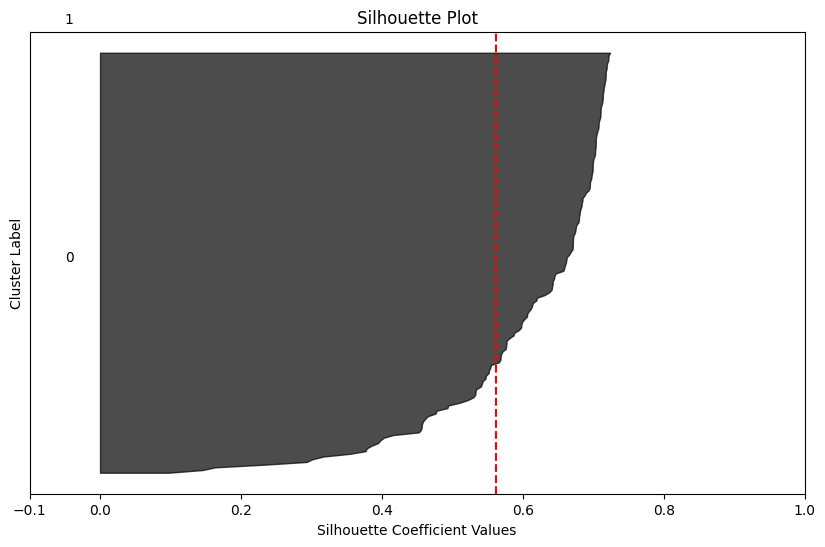

In [114]:
# Calculate and print the silhouette score
silhouette_avg = silhouette_score(scores,DBSCAN_clustered['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Import necessary library
from sklearn.metrics import silhouette_samples

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scores,DBSCAN_clustered['Cluster'])

# Create a silhouette plot
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10

for i in range(len(np.unique(DBSCAN_clustered['Cluster']))):
    ith_cluster_silhouette_values = sample_silhouette_values[DBSCAN_clustered['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(DBSCAN_clustered['Cluster'])))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()